In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1) Interpolation

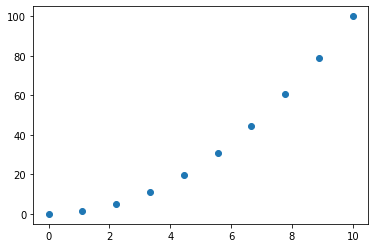

In [2]:
x = np.linspace(0,10,10)
y = x**2
plt.scatter(x,y)

In [3]:
#Interpolation pour avoir plus de point
# Cette fonction nous permet de generer une autre fonction 
from scipy.interpolate import interp1d

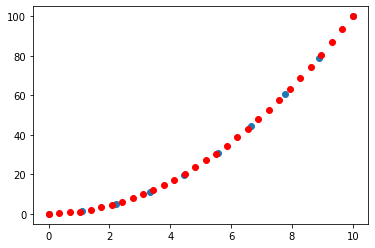

In [4]:
f = interp1d(x,y, kind="linear")
new_x = np.linspace(0,10,30)
result = f(new_x)
plt.scatter(x,y)
plt.scatter(new_x,result,c="r")

### 2) Optimisation
#### curve_fit

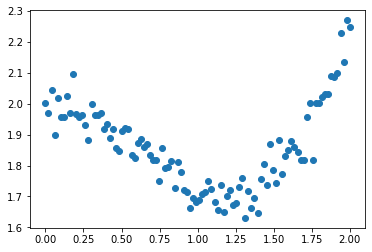

In [5]:
x = np.linspace(0,2,100)
y = 1/3*x**3 - 3/5 * x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x,y)

#### Developper un modele statistique qui rentre parfaitement bien dans le nuage des point.
#### On peut utiliser la fonction curve_fit qui se sert de la methode des moindres carres pour trouver les meilleurs parametre 


In [6]:
# Definir un modele
def f(x,a,b,c,d):
    return a * x**3 +b*x**2 + c*x + d

In [7]:
from scipy import optimize


In [8]:
params , param_cov = optimize.curve_fit(f,x,y)
# On obtient deux tableaux numpy ==> le premier : les differnts parametre du modele et le deuxieme :les differents covariance entre les parametres = (c'est la matrice de covariance du modele)

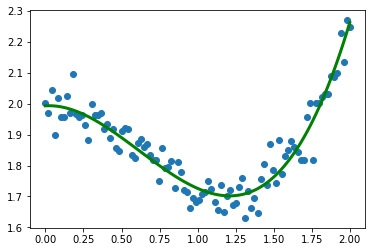

In [9]:
# C'est plus perfomant de le faire dans scikit learn
plt.scatter(x,y)
plt.plot(x,f(x,params[0] , params[1],params[2],params[3]), c="g" ,lw=3)

### 3) Minimisation
#### minimiser n'import quel fonction mathematique

In [10]:
def f(x):
    return x**2 + 15*np.sin(x)

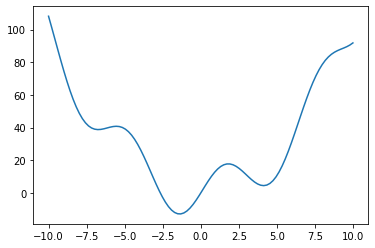

In [11]:
x = np.linspace(-10,10,100)
plt.plot(x,f(x))

In [12]:
# On Obtient avec sa un minimum locale mieux choisir un autre algo ou choisir un autre algorithme

result = optimize.minimize(f,x0=-5).x

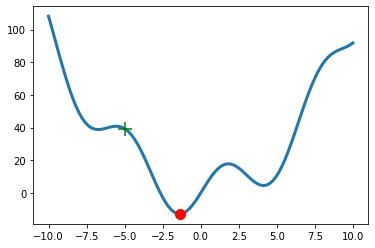

In [13]:
x0=-5
plt.plot(x,f(x),lw=3 , zorder = -1)
plt.scatter(result , f(result) ,s=100,c = 'r' , Zorder = 1)
plt.scatter(x0 , f(x0) , s=200 , marker='+' , c='g' , zorder=1)
plt.show()

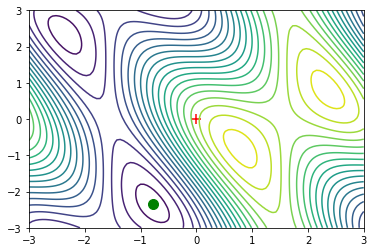

In [17]:
# Exemple de la video 15
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)
x,y = np.meshgrid(x,y)
plt.contour(x,y, f(np.array([x,y])), 20)
def f(x):
    return np.sin(x[0]) + np.cos(x[0] + x[1])*np.cos(x[0])

x0 = np.zeros((2,1))
plt.scatter(x0[0] , x0[1] , marker='+' , c='r' , s=100)

result = optimize.minimize(f,x0 =x0).x
plt.scatter(result[0],result[1] , c='g' ,s=100)

### 3) Traitement du Signal

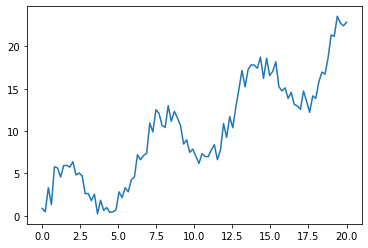

In [19]:
x = np.linspace(0,20,100)
y = x + 4*np.sin(x) + np.random.randn(x.shape[0])
plt.plot(x,y)

In [20]:
from scipy import signal

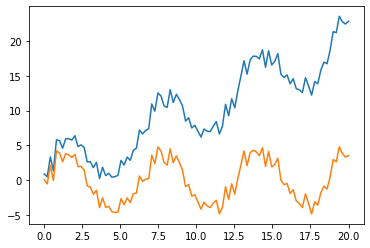

In [21]:
new_y = signal.detrend(y)
plt.plot(x,y)
plt.plot(x,new_y)
# On obtient le signal originel et le signal sans tendance lineaire

### Transformation de Fourier
#### C' est une technique mathematique qui permet d'extraire et d'analyser les frequences qui sont presente dans une signal periodique

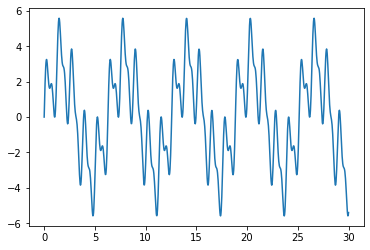

In [23]:
x = np.linspace(0,30,1000)
y = 3*np.sin(x) + 2*np.sin(5*x) +np.sin(10*x)
plt.plot(x,y)

In [24]:
from scipy import fftpack

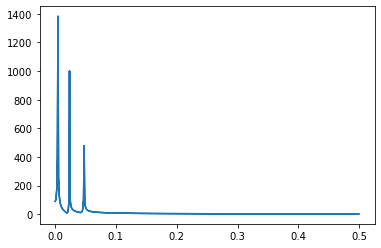

In [30]:
#Quand on utilise ces fonctions on va avoir des frequences negatives et des amplitudes negatives ==> il faut filtrer
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences) , power)

### Filtrer un Signal

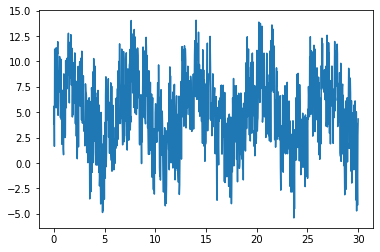

In [33]:
x = np.linspace(0,30,1000)
y = 3*np.sin(x) + 2*np.sin(5*x) +np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x,y)

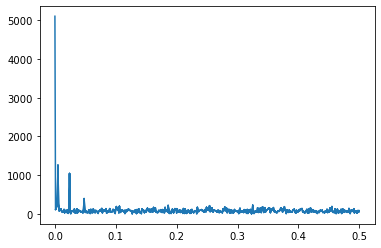

In [34]:
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences) , power)

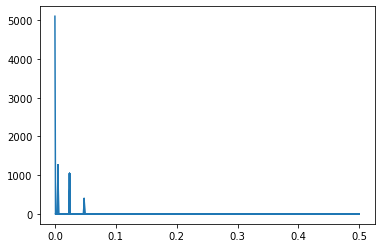

In [35]:
# Filtrer le spectre ==> enlever le buit
fourier[power<400] = 0
plt.plot(np.abs(frequences) , np.abs(fourier))

In [36]:
# Transformation de fourier inverse
filtered_signal = fftpack.ifft(fourier)

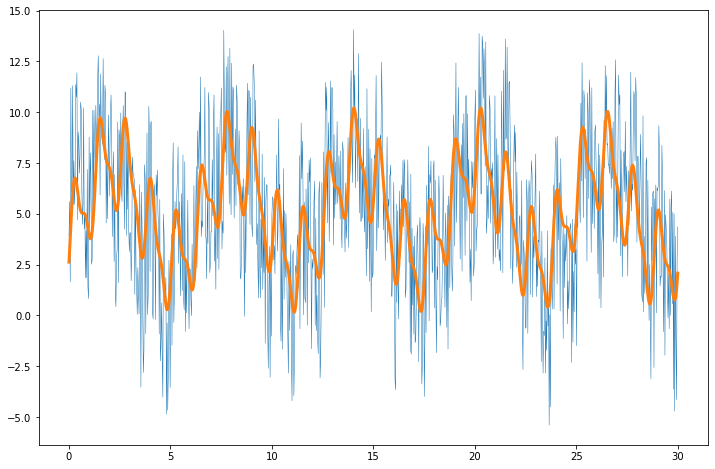

In [37]:
plt.figure(figsize=(12,8))
plt.plot(x,y,lw=0.5)
plt.plot(x,filtered_signal,lw=3)
plt.show()

In [38]:
### Traitement d'image

In [41]:
from scipy import ndimage

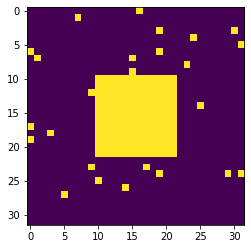

In [43]:
np.random.seed(0)
X = np.zeros((32,32))
X[10:-10,10:-10] = 1
X[np.random.randint(0,32,30) , np.random.randint(0,32,30)] = 1
plt.imshow(X)

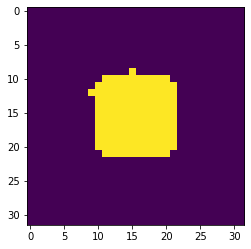

In [44]:
open_x = ndimage.binary_opening(X)
plt.imshow(open_x)

(508, 770)

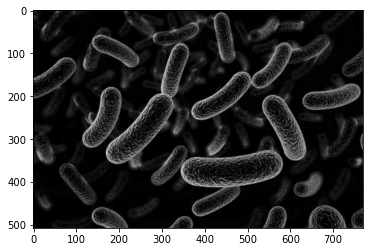

In [58]:
#
image = plt.imread('bacteria.jpg') # Importer l'image
image = image[:,:,0]
plt.imshow(image, cmap='gray')
image.shape

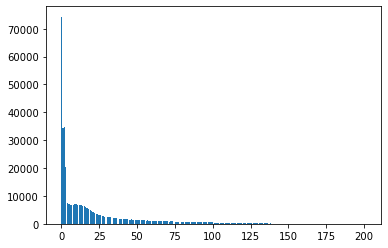

In [59]:
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins=255)
plt.show()

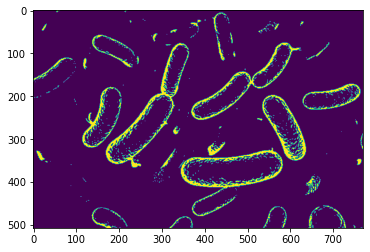

In [71]:
image = plt.imread('bacteria.jpg') # Importer l'image
image = image[:,:,0]
image = image > 75
plt.imshow(image)

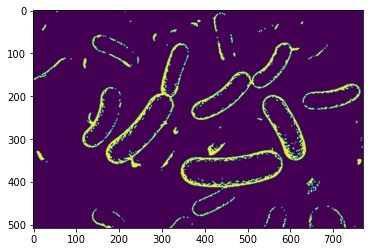

In [72]:
open_x = ndimage.binary_opening(image)
plt.imshow(open_x)

In [73]:
# Segmenter l'imag et mettre une etiquette sur chacune des bacteries
label_image , n_labels = ndimage.label(open_x)
n_labels

224

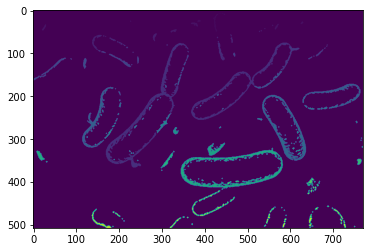

In [74]:
plt.imshow(label_image)

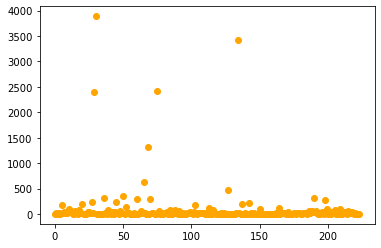

In [76]:
# Le nombre de pixels de chaque groupe
sizes = ndimage.sum(open_x, label_image,range(n_labels))
plt.scatter(range(n_labels) , sizes , c='orange')

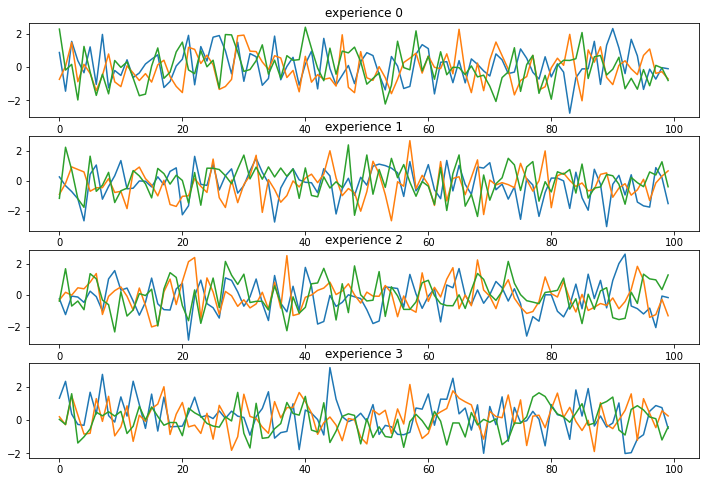

In [77]:
# Exercice
# code tres utile
dataset = {f"experience {i}":np.random.randn(100,3) for i in range(4)}
def graphique(data):
    n = len(data)
    plt.figure(figsize=(12,8))
    for k,i in zip(data.keys() , range(1,n+1)):
        plt.subplot(n,1,i)
        plt.plot(data[k])
        plt.title(k)
    plt.show()
graphique(dataset)

In [81]:
# n = dataset.values.shape[1]
# plt.figure(figsize=(12,8))
# for i in range(n):
#     plt.subplot(n//2,n//2,i+1)
#     plt.scatter(x[:,0],x[:,i] , c=y)
#     plt.xlabel('0')
#     plt.ylabel(i)
# plt.show()

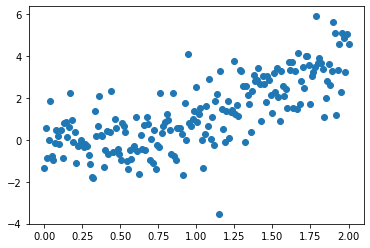

In [97]:
k=2
m=200
x = np.linspace(0,k,m)
y = x**2 +  np.random.randn(x.shape[0])

plt.scatter(x,y)